<a href="https://colab.research.google.com/github/aps1070-2019/All_Labs_Answers/blob/master/lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APS1070
#### PCA - Project 3

Project 3 is structured a bit differently than Projects 1 and 2 - here, all the code for the tutorial part is given. You're encouraged to read closely, adjust and experiment to make sure you fully understand what the code is doing. Once you have a firm grasp of PCA, you should be in great shape for the exercises at the end. Note that all 12.5 marks for this project are attributed to the exercises. The tutorial is not marked.

Please fill out the following:


*   Your **name**: xujunxi
*   Your **student number**: 1004532151



## How to use this Notebook

1. Run the cells to get a bird's eye view of whats going on.
2. Interact with the code to better understand how it works - add cells, plot values, change parameters, etc.
3. Complete exercises.


## Principle Component Analysis - Introduction

### Principle Component Analysis

As you get deeper in the world of data science, you'll learn that in practice it's very uncommon to work with datasets that are 2 or 3 dimensional, and so can be plotted directly. We're now going to look at _dimensionality reduction_ : a category of unsupervised algorithms which attempt to collapse high-dimensional datasets into a low-dimensional space.

As suggested above, one reason to do this is to aid visualization. However, that's far from the only reason dimensionality reduction is useful! These techniques also allow us to filter noise, extract useful features, and accomplish much more.

Let's dive into PCA with the Iris dataset.

### PCA - Overview

1. Standardize the data.


2. Obtain the Eigenvectors and Eigenvalues from the Covariance matrix (or Correlation matrix), or perform Singular Vector Decomposition.


3. Sort eigenvalues in descending order and choose the 𝑘 eigenvectors that correspond to the 𝑘 largest eigenvalues where 𝑘 is the number of dimensions of the new feature subspace. 𝑘 is less than original dimensionality.


4. Construct the projection matrix 𝐖 from the selected 𝑘 eigenvectors.


5. Transform the original dataset 𝐗 via 𝐖 to obtain a 𝑘-dimensional feature subspace 𝐘.

## PCA - Iris dataset

What's that flower?

### Intro

For the following tutorial, we will be working with the famous "Iris" dataset that has been deposited on the UCI machine learning repository
(https://archive.ics.uci.edu/ml/datasets/Iris).

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset are:
1. Iris-setosa (n=50)
1. Iris-versicolor (n=50)
1. Iris-virginica (n=50)

And the four features of in Iris dataset are:
1. sepal length in cm
1. sepal width in cm
1. petal length in cm
1. petal width in cm

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [0]:
df = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [0]:
labels = set(y)
labels

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

### Exploratory Data Analysis

Let's explore a bit.

4


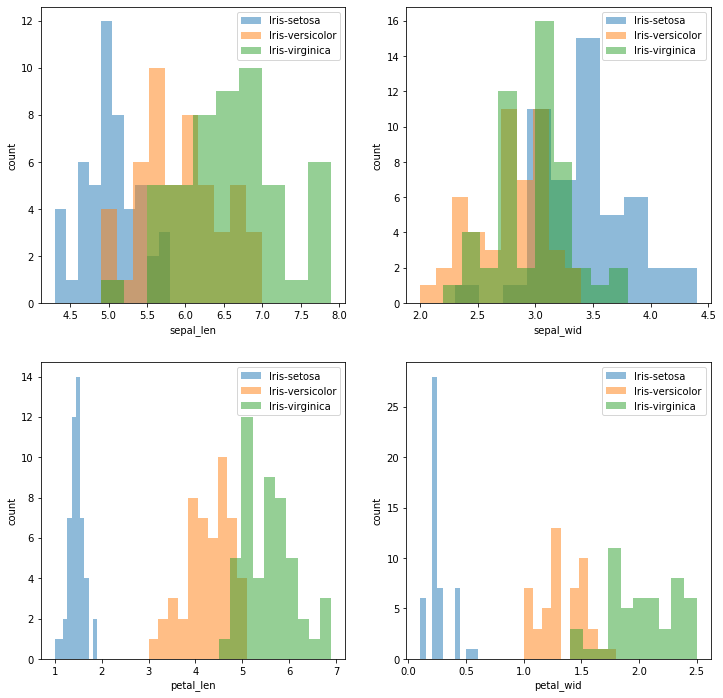

In [0]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
noOfCols = X.shape[1]
print (noOfCols)
#print(noOfCols)

# iterate over each column (feature), and plot in separate sub-plot.
for col in range(noOfCols):
    # plot data for different labels for choosen column (feature).
    for label in labels:
        axes.flat[col].hist(X[y==label, col], alpha=0.5, label=label)
        
    axes.flat[col].legend(loc='upper right')
    axes.flat[col].set(xlabel=df.columns[col], ylabel='count')

As one can see, no feature can on it's own predict the class of the flower.

### Standardizing Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. 

Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [0]:
X_std = StandardScaler().fit_transform(X)

In [0]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [0]:
X[:, 0].mean(), X_std[:, 0].mean()

(5.843333333333334, -4.736951571734001e-16)

In [0]:
X[:, 0].var(), X_std[:, 0].var()

(0.6811222222222223, 1.0)

### Eigendecomposition - Computing Eigenvectors and Eigenvalues

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

Methods to perform PCA:
1. The classic approach to PCA is to perform the eigendecomposition on the covariance matrix Σ, which is a 𝑑×𝑑 matrix where each element represents the covariance between two features.
2. But, most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency.

#### Using Covariance Matrix

In [0]:
n, m = X_std.shape

# Compute covariance matrix
C = np.dot(X_std.T, X_std) / (n-1) 
# or C = np.cov(X_std.T)

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(C) 
eigenVectors, eigenValues

(array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]),
 array([2.93035378, 0.92740362, 0.14834223, 0.02074601]))

#### Using Singular Vector Decomposition

In [0]:
eigenVectors, s, v = np.linalg.svd(X_std.T)
eigenVectors

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [0]:
n, m = X_std.shape
eigenValues = s**2/(n-1)
eigenValues

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

Are the eigenVectors and the eigenValues returned by both the methods the same?

#### Sort based on eigenValues

Decreasing order of eigenValues.
It was not needed in this case as eigenValues were already in decreasing order.

In [0]:
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

### Explained Variance

In [0]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
cumExpVar

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

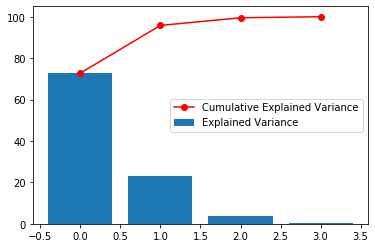

In [0]:
plt.bar(range(4), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

How many eigenValues are needed to explain more than 95% of variance?

### Projections

Since only 2 eigenVectors are enough to explain more than 95% of variance, we'll create the projection matrix using the first 2 eigenVectors.

In [0]:
COUNT = 2
W = eigenVectors[:, 0:COUNT]
W

array([[-0.52237162, -0.37231836],
       [ 0.26335492, -0.92555649],
       [-0.58125401, -0.02109478],
       [-0.56561105, -0.06541577]])

In [0]:
projX = np.dot(X_std, W)
X.shape, projX.shape

((150, 4), (150, 2))

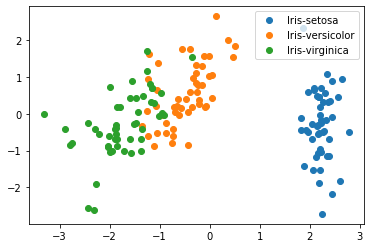

In [0]:
for label in labels:
    plt.plot(projX[y==label, 0], projX[y==label, 1], 'o', label=label)
    plt.legend(loc='upper right')

What has PCA helped us achieve here?

1. Visualization: easier visualization of all 3 classes
2. Classification: a flower of unknown class can be plotted here, and then classified visually or using algorithms (such as KNNs) 

We have used PCA on numerical data. But can it used on Image data?

## Eigenfaces

Let's face the Eigen.

### Intro

**Eigenfaces** is the name given to a set of **eigenvectors** when they are used in the computer vision problem of human face recognition. The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification.

Eigenfaces refers to an appearance-based approach to face recognition that seeks to capture the variation in a collection of face images and use this information to encode and compare images of individual faces in a holistic (as opposed to a parts-based or feature-based) manner. 

The motivation of Eigenfaces is twofold:

1. Extract the relevant facial information, which may or may not be directly related to human intuition of face features such as the eyes, nose, and lips. One way to do so is to capture the statistical variation between face images.
2. Represent face images efficiently. To reduce the computation and space complexity, each face image can be represented using a small number of parameters.

Images are downloaded from [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/).

In [0]:
!pip install wget

In [0]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import wget
import math

In [0]:
# Download and unzip dataset.
filename = wget.download('https://github.com/aps1070-2019/datasets/raw/master/lfw-a.tgz', 'lfw-a.tgz')
!tar -xvzf "{filename}"

lfw/Aaron_Eckhart/
lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg
lfw/Aaron_Guiel/
lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg
lfw/Aaron_Patterson/
lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg
lfw/Aaron_Peirsol/
lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg
lfw/Aaron_Peirsol/Aaron_Peirsol_0002.jpg
lfw/Aaron_Peirsol/Aaron_Peirsol_0003.jpg
lfw/Aaron_Peirsol/Aaron_Peirsol_0004.jpg
lfw/Aaron_Pena/
lfw/Aaron_Pena/Aaron_Pena_0001.jpg
lfw/Aaron_Sorkin/
lfw/Aaron_Sorkin/Aaron_Sorkin_0001.jpg
lfw/Aaron_Sorkin/Aaron_Sorkin_0002.jpg
lfw/Aaron_Tippin/
lfw/Aaron_Tippin/Aaron_Tippin_0001.jpg
lfw/Abba_Eban/
lfw/Abba_Eban/Abba_Eban_0001.jpg
lfw/Abbas_Kiarostami/
lfw/Abbas_Kiarostami/Abbas_Kiarostami_0001.jpg
lfw/Abdel_Aziz_Al-Hakim/
lfw/Abdel_Aziz_Al-Hakim/Abdel_Aziz_Al-Hakim_0001.jpg
lfw/Abdel_Madi_Shabneh/
lfw/Abdel_Madi_Shabneh/Abdel_Madi_Shabneh_0001.jpg
lfw/Abdel_Nasser_Assidi/
lfw/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0001.jpg
lfw/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0002.jpg
lfw/Abdoulaye_Wade/
lfw/Abdoulay

In [0]:
# constants
IMAGE_DIR = 'lfw'
DEFAULT_SIZE = [250, 250] 

In [0]:
# Reads images from filesystem and returns Array of images and imageNames.
def readImages(imagePath = IMAGE_DIR, defaultSize = DEFAULT_SIZE):
    images = []
    imageNames = []
    imageDirs = [image for image in os.listdir(imagePath) if not image.startswith('.')]

    for imageDir in imageDirs:
        dirPath = os.path.join(imagePath, imageDir)
        dirImageNames = [image for image in os.listdir(dirPath) if not image.startswith('.')]
        
        for imageName in dirImageNames:
            image = Image.open(os.path.join(dirPath, imageName))
            image = image.convert ("L") # L stands for Luminance: converts image to grayscale
            
            if (defaultSize is not None):
                image = image.resize(defaultSize, Image.ANTIALIAS) # resize image
                
            images.append(np.asarray(image, dtype = np.uint8))
            imageNames.append(imageDir)
    return [images, imageNames]

In [0]:
[X, y] = readImages()   #X: 1054 pictures represented by 250x250 dimensions. y: target variable, which is the name of the person on the picture

In [0]:
type(X), len(X)

(list, 1054)

In [0]:
type(X[0]), X[0].shape

(numpy.ndarray, (250, 250))

In [0]:
type(y), len(y) #1054 images, each has shape of 250x250. len(X)=1054, X[0]shape=(250,250)

(list, 1054)

### Exploratory Data Analysis

Check from dataset if this image has correct label.

Image name is:  Adrien_Brody


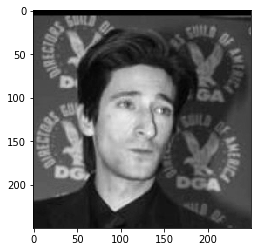

In [0]:
print('Image name is: ', y[2])
plt.imshow(X[2], cmap=plt.cm.gray)
plt.show()

Creating a mean face from all dataset faces.

In [0]:
def asRowMatrix(X):
    if len(X) == 0: return np.array([])
    rowMatrix = np.empty((0, X[0].size), dtype = X[0].dtype)
    for img in X:
        rowMatrix = np.vstack((rowMatrix, np.asarray(img).reshape(1, -1)))
    return rowMatrix

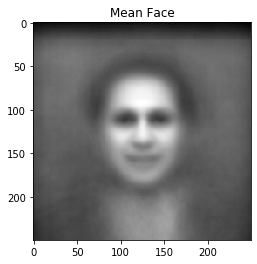

In [0]:
XMat = asRowMatrix(X);
meanImage = np.reshape(XMat.mean(axis=0), X[0].shape)
plt.imshow(meanImage, cmap=plt.cm.gray)
plt.title('Mean Face')
plt.show()

### Eigendecomposition - Computing Eigenvectors and Eigenvalues

#### Using Covariance Matrix

In [0]:
def getBasisCountThatPreservesVariance(eigenValues, variance=.95):
    for idx, cumulativeSum in enumerate(np.cumsum(eigenValues) / np.sum(eigenValues)):
        if cumulativeSum > variance:
            return idx
        
def pca(X, y):
    n, d = X.shape
    mu = X.mean(axis=0)
    X = X - mu # standardising data
    
    if n > d:
        C = np.dot(X.T, X) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
    else:
        C = np.dot(X, X.T) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
        eigenVectors = np.dot(X.T, eigenVectors)
        for i in range(n):
            eigenVectors[:,i] = eigenVectors[:, i] / np.linalg.norm(eigenVectors[:, i])
            
    # sort eigenVectors in descending order by their eigenValue
    idx = np.argsort(-eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]
    
    # select based on numOfBasis
    numOfBasis = getBasisCountThatPreservesVariance(eigenValues)
    print('Number of useful eigenBasis are: ', numOfBasis)
    eigenValues = eigenValues[0:numOfBasis].copy()
    eigenVectors = eigenVectors[:, 0:numOfBasis].copy()
    return eigenValues, eigenVectors, mu

Below image explains the PCA code above:

<img src='https://github.com/aps1070-2019/datasets/raw/master/img/eig-decom.png' />

In [0]:
eigenValues, eigenVectors, mean = pca(XMat, y)

Number of useful eigenBasis are:  298


In [0]:
# Above code in pca method is written because below code is computationally time taking.
# C = np.dot(XMat.T, XMat) # covariance matrix
# eigenValues, eigenVectors = np.linalg.eigh(C)

#### EigenFaces

**What were dimensions of eigenVector in the case of Iris example?**

Array of size = number of features (4 in the case of Iris).
Array of size 4.

**What will be dimensions of eigenVector in this example?**

Array of size = feature size (62500). 

In [0]:
eigenVectors[:, 0].shape

(62500,)

If the dimensions of eigenVector is same as the vectorised image.

What if eigenVector is displayed in image format.

This is called **eigenFace.**

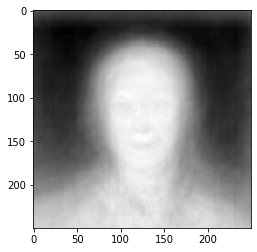

In [0]:
# show the first eigenFace
plt.imshow(eigenVectors[:, 0].reshape(-1, 250), cmap = plt.cm.gray)

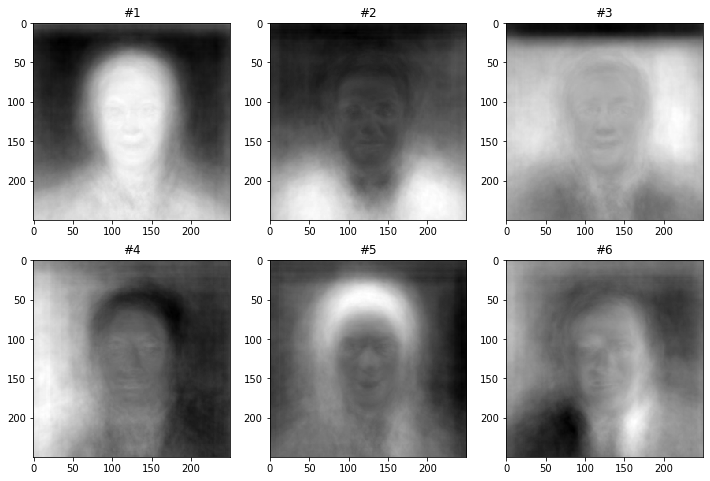

In [0]:
# print first 6 eigen faces
COUNT = 6
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(eigenVectors[:, i].reshape(-1, 250), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

By only using first few eigenFaces:
1. How would you get a face with white hair.
2. Answer the same for black hair.

Have a good look at eigenFace number 5.

Good luck sleeping tonight.

1. **Plot the next 6 eigenFaces.**
2. **Do you observe any difference observed between the first 6 and second 6.**

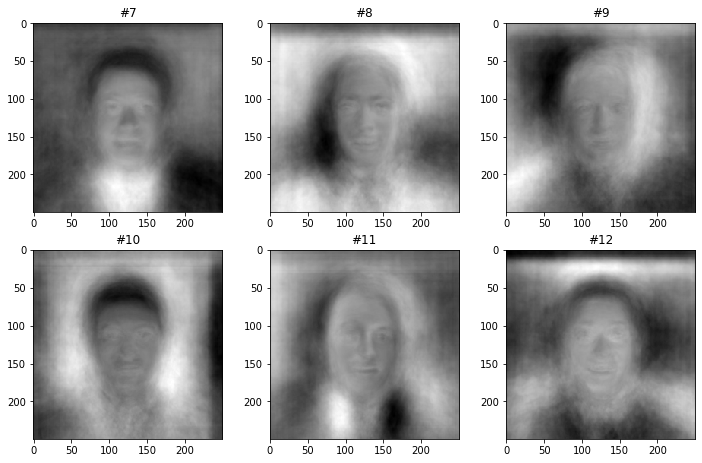

In [0]:
# print second 6 eigen faces
COUNT = 12
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(6, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(eigenVectors[:, i].reshape(-1, 250), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

### Projections

Now, we will reconstruct an image from the dataset using eigenFaces (eigenVectors).

In [0]:
IMAGE_IDX = 10 # image idx in dataset

In [0]:
def project (W , X , mu):
    return np.dot (X - mu , W)
def reconstruct (W , Y , mu) :
    return np.dot (Y , W.T) + mu

In [0]:
# create reconstructed images
COUNT = 6 # count of first eigenVectors used to reconstruct the image
reconImages = []
for numEvs in range (1, COUNT+1):
    P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconImages.append(R.reshape(X[0].shape))

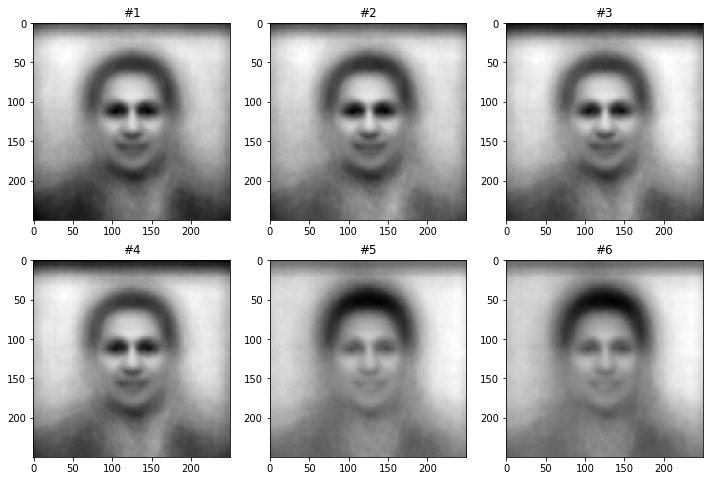

In [0]:
# plot reconstructed images
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i], cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

In [0]:
# create reconstructed images
numEvsSet = [100, 200, 298] # these no. of eigenVectors will be used to reconstruct the image.
COUNT = len(numEvsSet)
reconImages = []
for numEvs in numEvsSet:
    P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconImages.append(R.reshape(X[0].shape))

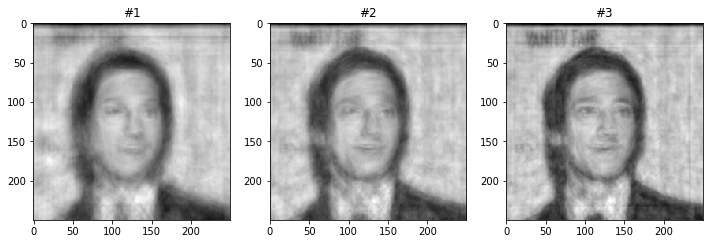

In [0]:
# plot reconstructed images
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i], cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

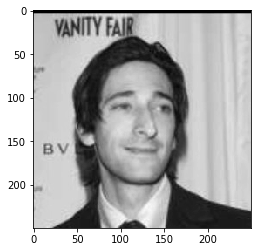

In [0]:
# actual image
plt.imshow(X[IMAGE_IDX], cmap=plt.cm.gray)
plt.show()

Can you identify the person after 298 eigenVector reconstruction?

### Facial Recognition (Optional)

**How a new point would be classified on the IRIS dataset after PCA.**

1. Projecting all training samples into the PCA subspace.
2. Projecting the query image into the PCA subspace.
3. Finding the nearest neighbor (one algorithm to accomplish this) between the projected training images and the projected query image. 

**How would a new face be classified (facial recognition) after PCA.**



**FunFact: EigenFaces is still often considered as a baseline comparison method to demonstrate the minimum expected performance of a facial recognition system.**

## Time Series Data - Exercises

The clock is ticking.

The dataset is of Tuberculosis prevalence over various countries between the given time period.

Data url: 'https://raw.githubusercontent.com/aps1070-2019/datasets/master/tb-data.csv'.

Answer the below questions.

You are free to do the below analysis over other time-series datasets of your interest (eg: financial stock data, etc.), provided the dataset has at least 15 columns (time points / features) and at least 100 rows (data points).

### Question 1

1. Display 30 random samples of the original time series data in a 10 x 3 (3 plots each in 10 rows) graph format.[1]  
2. Do you see any recurring patterns (ie oscillations, monotonic increase or decrease, other trends)?[0.5]

#### Q1.1

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/tb-data.csv',thousands=',')
random.seed(50)
df1 = df.sample(n=30, random_state=60)

In [3]:
df

,"TB prevalence, all forms (per 100 000 population per year)",1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25
203,West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31
204,Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130
205,Zambia,436,456,494,526,556,585,602,626,634,657,658,680,517,478,468,453,422,387


In [0]:
X1 = df1.iloc[:,1:]#.values
y1 = df1.iloc[:,0]#.values

30


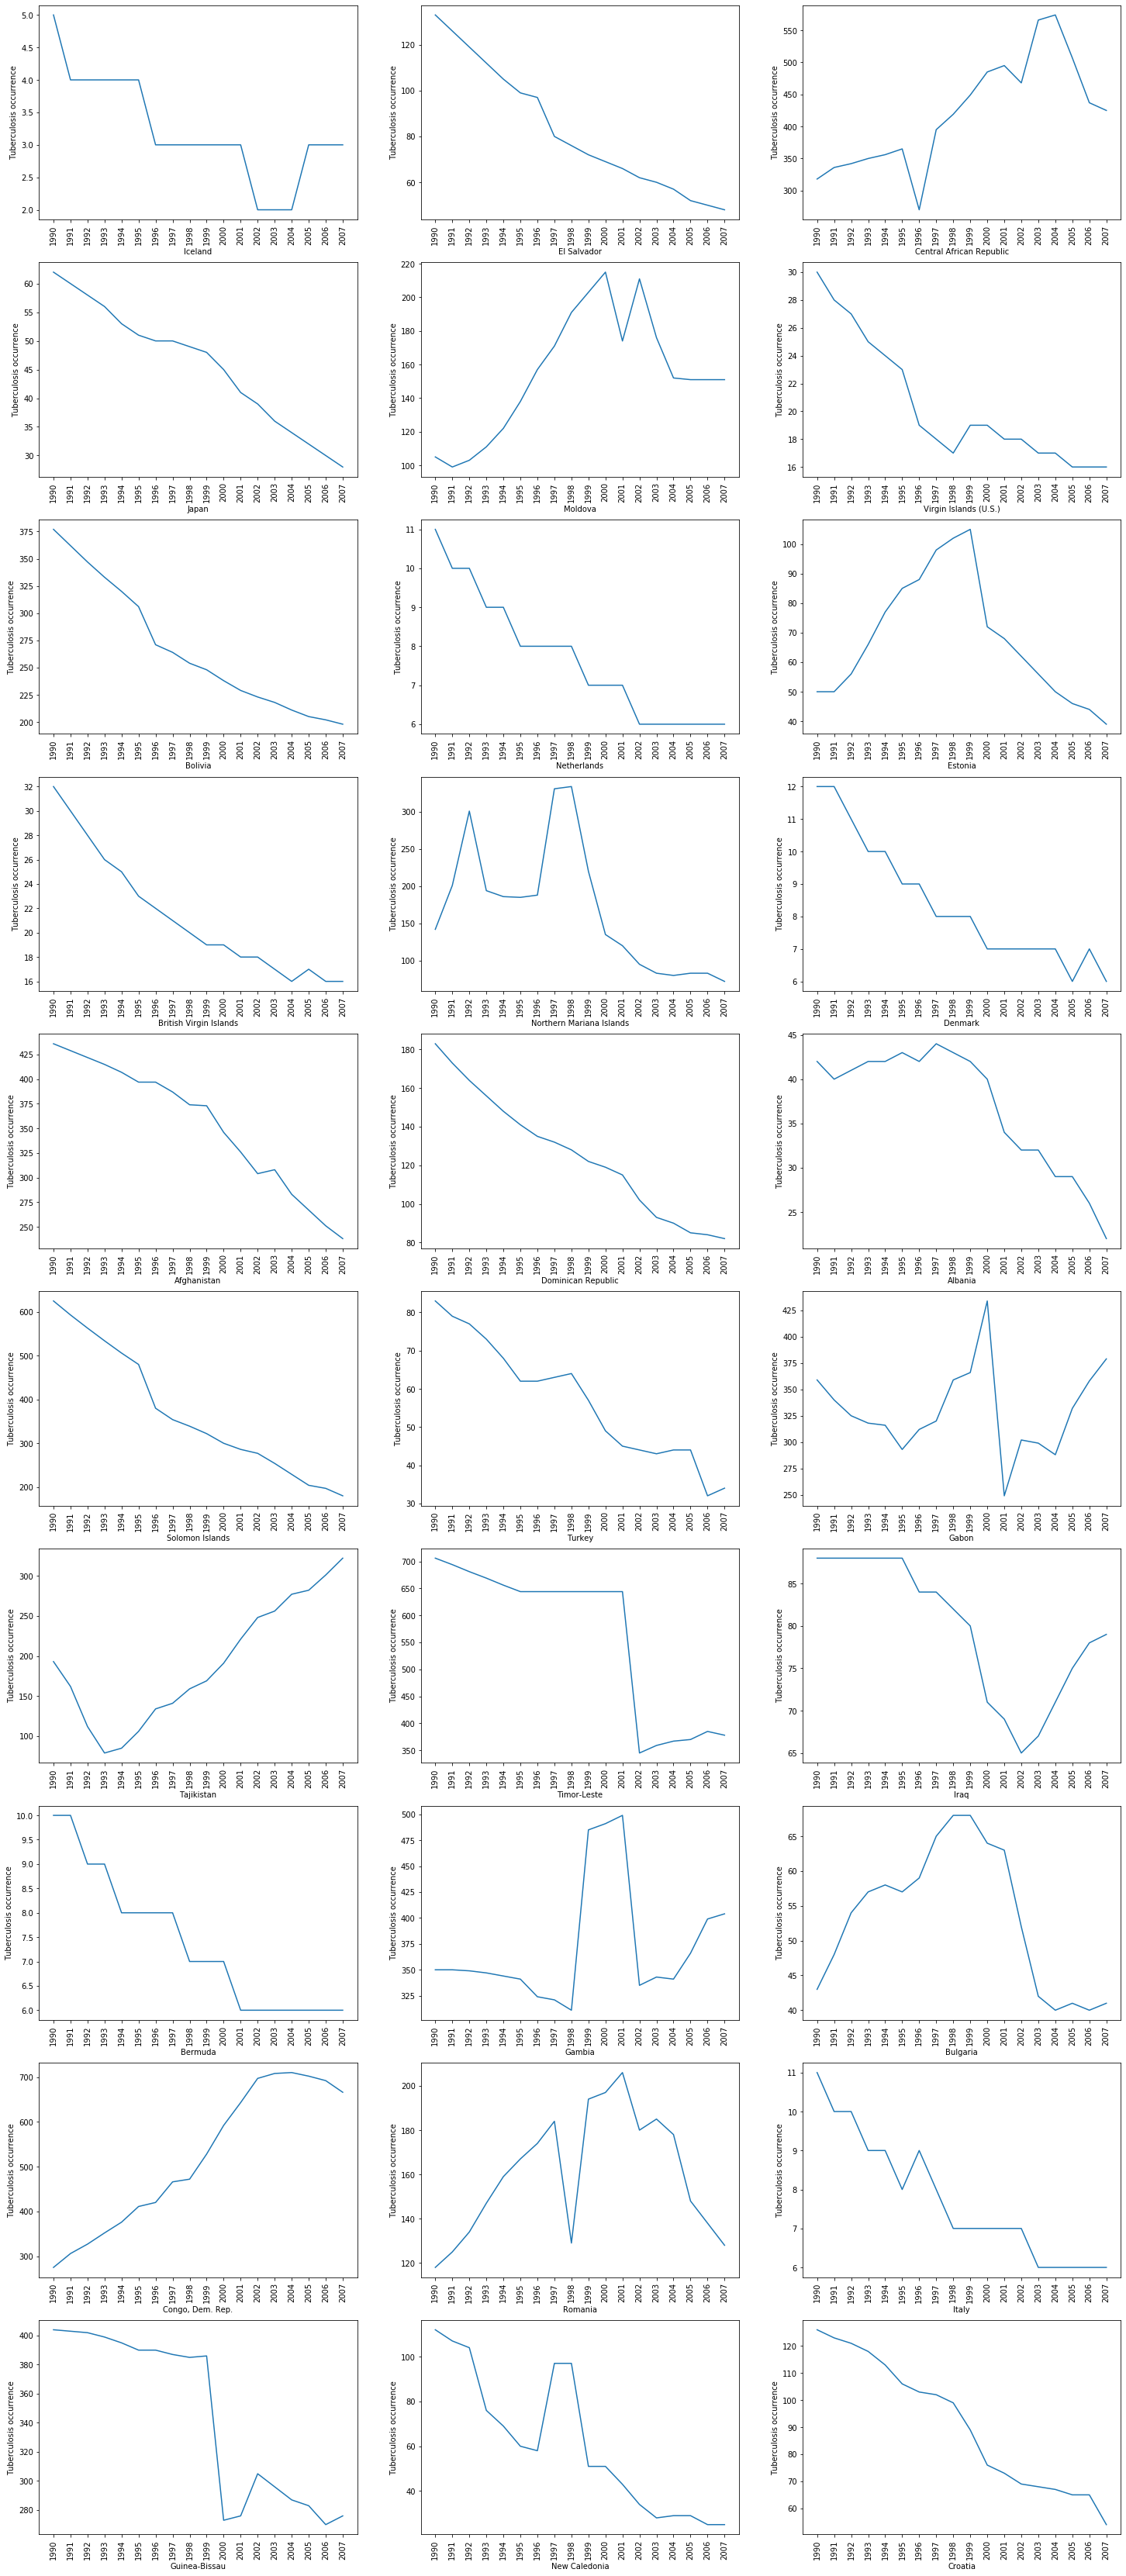

In [0]:
fig, axes = plt.subplots(10, 3, figsize=(25,60))
noOfRows = len(y1)
print (noOfRows)
for i in range (noOfRows):
  axes.flat[i].plot(X1.iloc[i])
  axes.flat[i].set_xticklabels(X1, rotation=90)
  axes.flat[i].set_xlabel(y1.values[i])
  axes.flat[i].set_ylabel('Tuberculosis occurrence')


#### Q1.2

**Yes, some countries have oscillation pattern (such as Romania, Gambia, Bulgaria, etc) while some countries have monotonic decrease pattern (such as Croatia, Japan and Netherland. None of these 30 samples has monotonic increase pattern.**

### Question 2

1. Show the first 6 principle components plotted as a time series (in a 3 plots/row format).[1]  
2. Based on your knowledge of the dataset contents, can you explain what any of the principle components might represent?[0.5]

#### Q2.1

In [0]:
X0 = df.iloc[:,1:]
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [0]:
X_std = StandardScaler().fit_transform(X)

In [0]:
n, m = X_std.shape  #n=207, m=18

# Compute covariance matrix
C = np.dot(X_std.T, X_std) / (n-1) 
# or C = np.cov(X_std.T) C is a 18x18 square matrix

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(C) 
eigenVectors, eigenValues

(array([[ 2.29487633e-01, -3.23116557e-01, -2.20922152e-01,
          8.61204262e-02, -1.12433212e-01,  4.43010126e-01,
          2.83876246e-01, -1.03024000e-01,  4.94315937e-02,
         -1.14482974e-01, -1.12541988e-01,  6.15754094e-02,
         -1.58109554e-01,  1.05891307e-01, -5.38852912e-01,
          2.30500249e-01,  2.73445941e-01,  1.11692826e-02],
        [ 2.31606199e-01, -3.04887477e-01, -2.12498372e-01,
         -8.05646067e-02, -1.31752196e-01,  2.66797923e-01,
          1.46252734e-01, -2.07630009e-01,  1.01666052e-01,
          1.86258852e-01,  3.03203749e-01, -1.48872570e-01,
          1.80127941e-01,  2.99961404e-01,  3.97096121e-01,
         -2.49621463e-01, -2.05342619e-01, -3.24048622e-01],
        [ 2.33308208e-01, -2.91223149e-01, -1.85559648e-01,
          1.70506004e-02, -1.58345893e-01,  7.04557107e-02,
         -7.64478760e-02, -2.96324757e-03, -1.66911994e-01,
         -2.08446470e-01,  1.67258320e-01, -1.40230922e-02,
         -1.48444190e-01, -6.34088699e

In [0]:
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

In [0]:
xlabels = list(df.iloc[:,1:].columns)

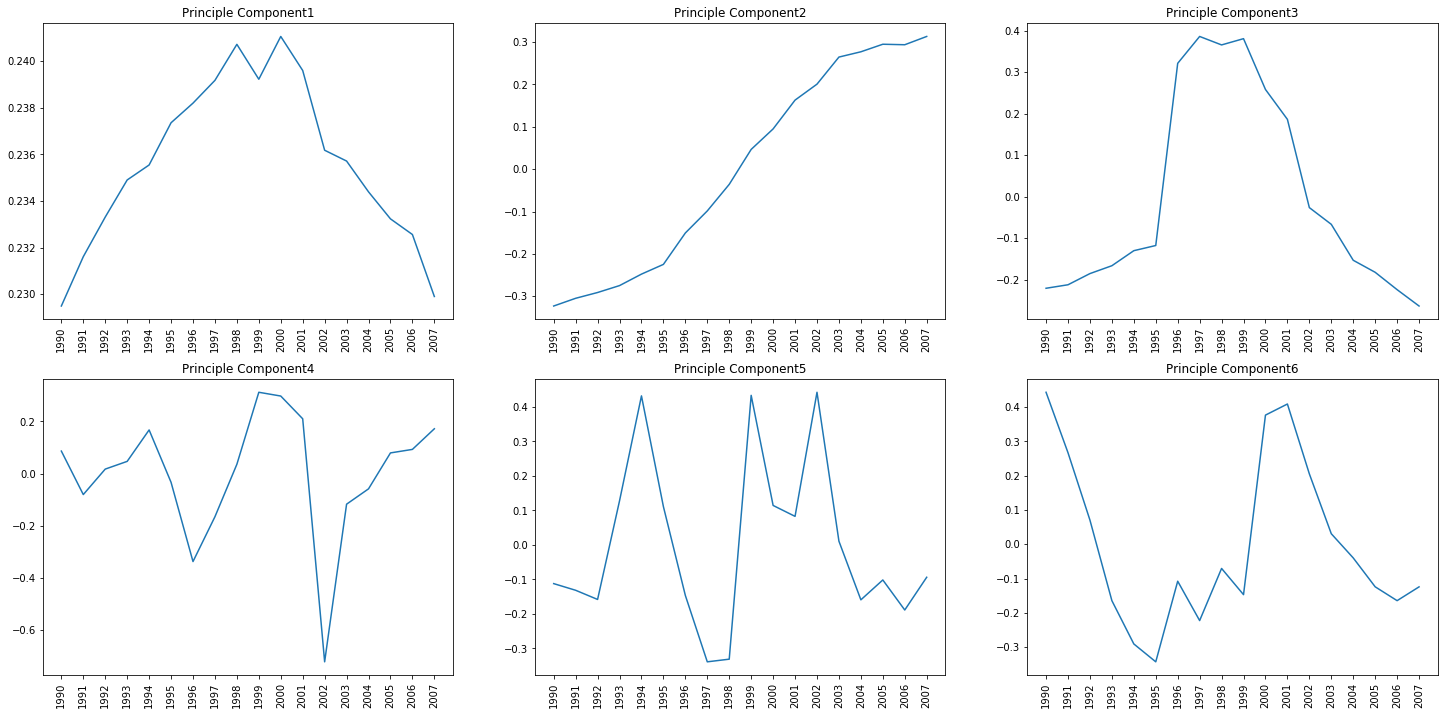

In [0]:
COUNT = 6
ROWS = math.ceil(COUNT/3) #2 rows
fig, axes = plt.subplots(2, 3, figsize=(25,ROWS * 6)) #2x3 subplots
for i in range(0, COUNT):
  axes.flat[i].plot(xlabels, eigenVectors[:, i])
  axes.flat[i].set_xticklabels(xlabels,rotation=90)
  axes.flat[i].set_title('Principle Component{}'.format(i+1))

#### Q2.2

**These principal components represent features that usefully explain variation in this data set. For example, the first principal componet is a best line we can fit to our data, showing some potential factors that affect the TB morbidity for different countries during different years. The second one is a best line to fit the errors from the first principal component.**

### Question 3

1. Pick an interesting data sample (ie, data from a single country) and display it.[1] 

2. Next, show its incremental reconstruction using the first 1-6 components (again plotted as a time series in a 3 plots/row format).[1]

3. In addition, show another plot with the residual error of each reconstruction compared to the original sample and a title that states the RMSE of the reconstruction for each of the 6 components.[1]

#### Q3.1

In [0]:
Index_Japan = df.loc[df['TB prevalence, all forms (per 100 000 population per year)']=='Japan'].index.tolist()
Index_Japan = Index_Japan[0]

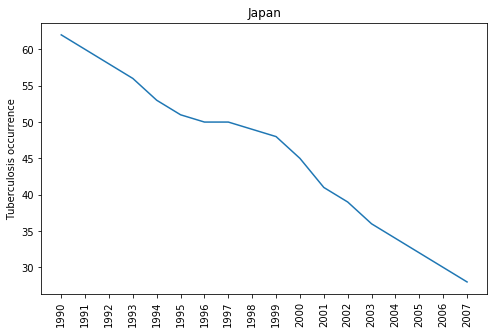

In [0]:
plt.figure(figsize=(8,5))
plt.plot(X0.iloc[Index_Japan])
plt.title('Japan')
plt.xticks(rotation=90)
plt.ylabel('Tuberculosis occurrence')
plt.show()

#### Q3.2

In [0]:
def asRowMatrix(X):
    if len(X) == 0: return np.array([])
    rowMatrix = np.empty((0, X[0].size), dtype = X[0].dtype)
    for row in X:
        rowMatrix = np.vstack((rowMatrix, np.asarray(row).reshape(1, -1)))
    return rowMatrix

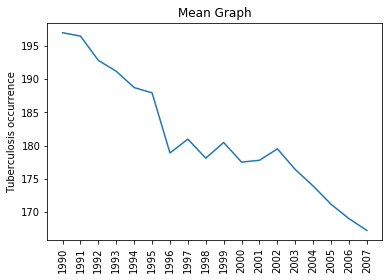

In [0]:
XMat = asRowMatrix(X);
meanGraph = np.reshape(XMat.mean(axis=0), X[0].shape)
plt.plot(xlabels,meanGraph)
plt.xticks(rotation=90)
plt.ylabel('Tuberculosis occurrence')
plt.title('Mean Graph')
plt.show()

In [0]:
def pca(X, y):
    n, d = X.shape
    mu = X.mean(axis=0)
    X = X - mu # standardising data
    
    if n > d:
        C = np.dot(X.T, X) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
    else:
        C = np.dot(X, X.T) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
        eigenVectors = np.dot(X.T, eigenVectors)
        for i in range(n):
            eigenVectors[:,i] = eigenVectors[:, i] / np.linalg.norm(eigenVectors[:, i])
            
    # sort eigenVectors in descending order by their eigenValue
    idx = np.argsort(-eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]
    print('Number of useful eigenBasis are: ', len(eigenVectors))

    return eigenValues, eigenVectors, mu

In [0]:
eigenValues, eigenVectors, mean = pca(XMat, y)

Number of useful eigenBasis are:  18


In [0]:
def project (W , X , mu):
    return np.dot (X - mu , W)
def reconstruct (W , Y , mu) :
    return np.dot (Y , W.T) + mu

In [0]:
COUNTRY_IDX = Index_Japan # country idx in dataset

In [0]:
X[COUNTRY_IDX]

array([62, 60, 58, 56, 53, 51, 50, 50, 49, 48, 45, 41, 39, 36, 34, 32, 30,
       28])

In [0]:
# create reconstructed graph
COUNT = 6 # count of first eigenVectors used to reconstruct the graph
reconGraph = []
for numEvs in range (1, COUNT+1):
    P = project(eigenVectors[:, 0:numEvs], X[COUNTRY_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconGraph.append(R.reshape(X[0].shape))

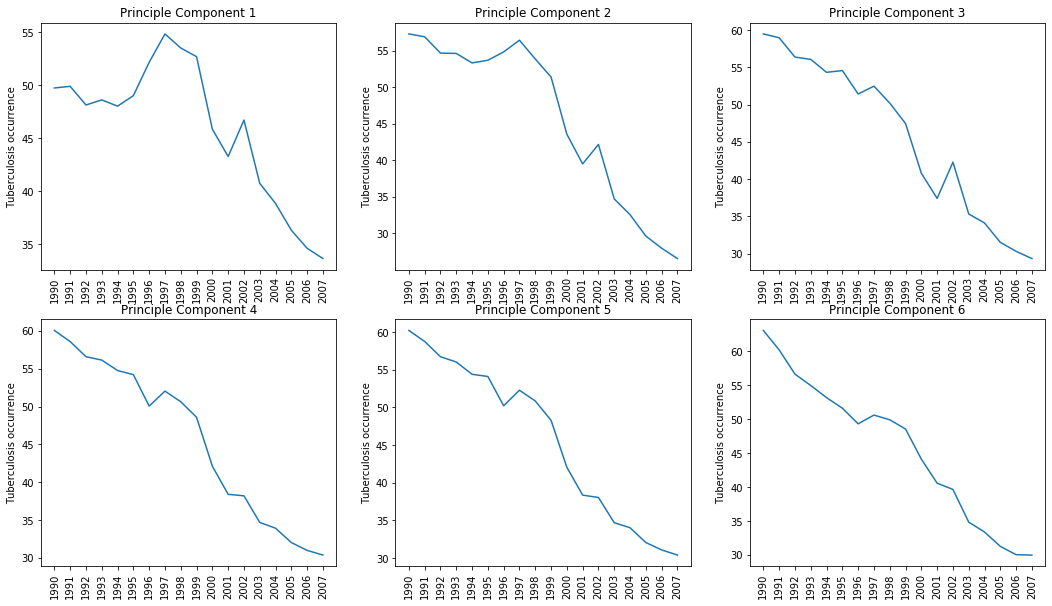

In [0]:
# plot reconstructed graph
ROWS = math.ceil(COUNT/3) # 2 rows
fig = plt.figure(figsize=(18, ROWS * 5))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.plot(xlabels,reconGraph[i])
    plt.xticks(rotation=90)
    plt.ylabel('Tuberculosis occurrence')
    plt.title('Principle Component {}'.format(i+1))

#### Q3.3

In [0]:
target = np.array(X0.iloc[Index_Japan])
n = len(X0.iloc[Index_Japan])

In [0]:
RMSE_data = []
for i in range(0, COUNT):
  for j in range(0,n):
    RMSE = np.linalg.norm(reconGraph[i][j] - target[j]) / np.sqrt(n)
  RMSE_data.append(RMSE)
RMSE_data = [round(elem, 2) for elem in RMSE_data]

In [0]:
COUNT = 6
Residual = []
for i in range(0, COUNT):
  Resi_list = []
  for j in range(0,n):
    Residual_num = abs(reconGraph[i][j] - target[j])
    Resi_list.append(Residual_num)
  Residual.append(Resi_list)

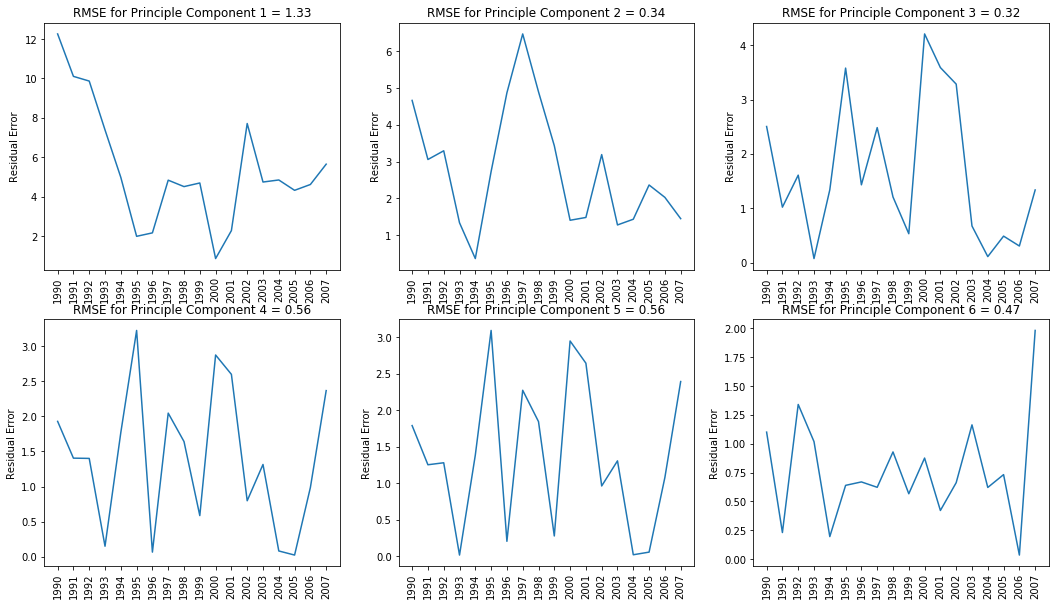

In [0]:
ROWS = math.ceil(COUNT/3) # 2 rows
fig = plt.figure(figsize=(18, ROWS * 5))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.plot(xlabels,Residual[i])
    plt.xticks(rotation=90)
    plt.ylabel('Residual Error')
    plt.title('RMSE for Principle Component {} = '.format(i+1) + str(RMSE_data[i]))

### Question 4

1. Plot the eigenvalues of the first 15 (or more) principle components and choose a number k of principle components that you believe will allow you to reconstruct the data well.[1]  
2. How many did you choose and why?[1]

#### Q4.1

In [0]:
eigenValues

array([1.49912816e+08, 9.88807357e+06, 1.76434771e+06, 3.90336164e+05,
       3.57663335e+05, 2.68989359e+05, 1.95133738e+05, 1.30280502e+05,
       1.03821492e+05, 7.53510122e+04, 5.24137278e+04, 4.35419427e+04,
       3.96475298e+04, 2.56360349e+04, 1.77109124e+04, 1.15570163e+04,
       6.86657241e+03, 3.90105222e+03])

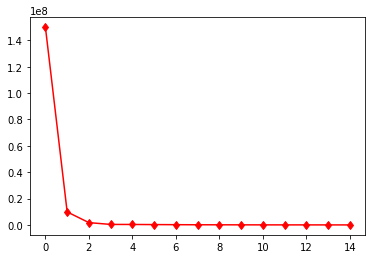

In [0]:
plt.plot(eigenValues[0:15],'r-d')
plt.show()

#### Q4.2

In [0]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)

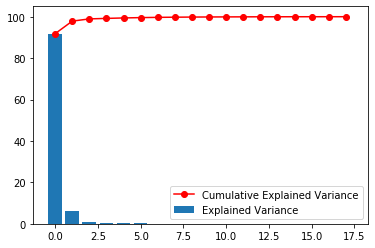

Number of Eigenvalues needed to explain more than 99% of variance = 4


In [0]:
plt.bar(range(18), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()
print('Number of Eigenvalues needed to explain more than 99% of variance =',np.argmax(cumExpVar>99)+1)

**4 eigenValues are needed to explain more than 99% of variance. So I choose 4 principal components to reconstruct the data well.**

### Question 5

use eigenvector from original data set

1. Compute the mean (M) and standard deviation (StD) of the interesting data sample selected in question 3.[0.5]

Random walk refers to any process in which there is no observable pattern or trend; that is, where the movements of an object, or the values taken by a certain variable, are completely random. Each "step" taken in a random walk can be sampled from a distribution. You may find the methods numpy.random.normal, numpy.cumsum useful for creating random walks. 

2. Make 6 time series of random walks of the same length as the time series in this dataset. Random walks created should have the same mean M and standard deviation StD as the data sample choosen. Each next step in the random walk is some Uniform or Gaussian perturbation from the previous sample.[1]
    - Show for a sample random walk it's mean and standard deviation matches M and StD respectively.
    - Visualize these 6 time series in a 2 x 3 plot.


3. Show the reconstruction of each time series using k principle components overlayed on the original random walk. Plot this in a 2 x 3 plot and report the RMSE of the reconstruction in the title of each plot.[1]
4. Compare these RMSE values with the ones you got for question 3.[1]

#### Q5.1

In [0]:
Japan_data = df.loc[df['TB prevalence, all forms (per 100 000 population per year)']=='Japan']
Japan_data = Japan_data.iloc[:,1:].values
M = np.mean(Japan_data)
StD = np.std(Japan_data)
print('Mean (M):', M,'\nStandard Deviation (StD):',StD)

Mean (M): 45.666666666666664 
Standard Deviation (StD): 10.295630140987


#### Q5.2

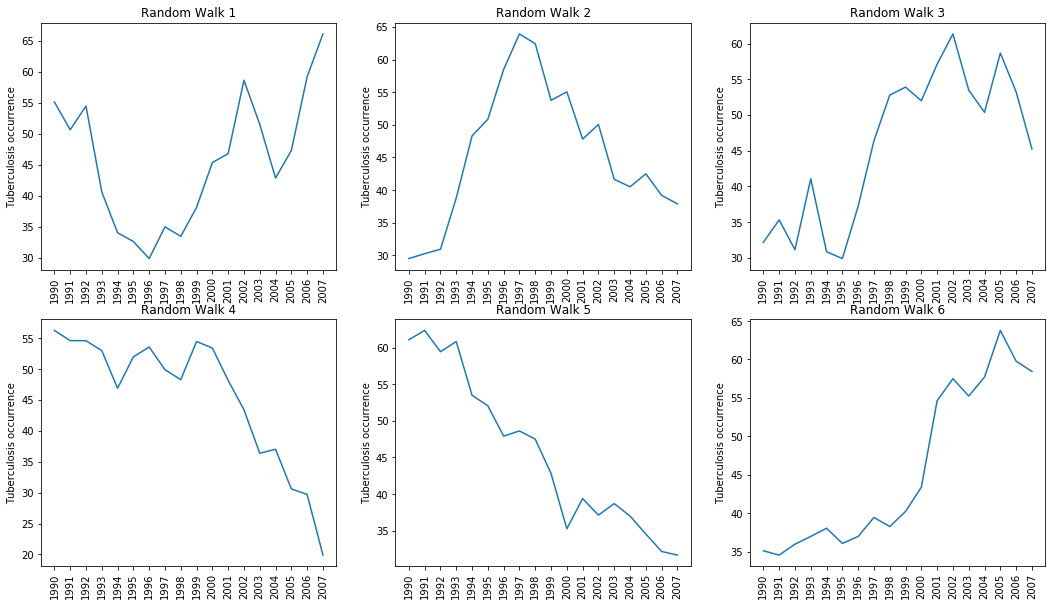

In [0]:
ranwalk_list=[]
fig = plt.figure(figsize=(18, 10))
for i in range(0,6):
  steps = np.random.normal(0, 1, 18)
  path = np.cumsum(steps)
  random_walk = StandardScaler().fit_transform(path.reshape(-1, 1))*StD+M
  plt.subplot(ROWS, 3, i+1)
  plt.plot(xlabels,random_walk)
  plt.xticks(rotation=90)
  plt.ylabel('Tuberculosis occurrence')
  plt.title('Random Walk {}'.format(i+1))
  ranwalk_list.append(random_walk)

In [0]:
print('Mean (M):', np.mean(ranwalk_list[0]),'\nStandard Deviation (StD):',np.std(ranwalk_list[0]))

Mean (M): 45.66666666666666 
Standard Deviation (StD): 10.295630140986999


#### Q5.3

In [0]:
RW_list = []
for i in range(0,6):
  ranwalk_list1 = ranwalk_list[i].reshape(18)
  RW_list.append(ranwalk_list1)

In [0]:
# create reconstructed graph
reconGraph = []
for i in range(0,6):
  P = project(eigenVectors[:, 0:4], RW_list[i].reshape(1, -1), mean)
  R = reconstruct(eigenVectors[:, 0:4], P, mean)
  reconGraph.append(R.reshape(RW_list[0].shape))

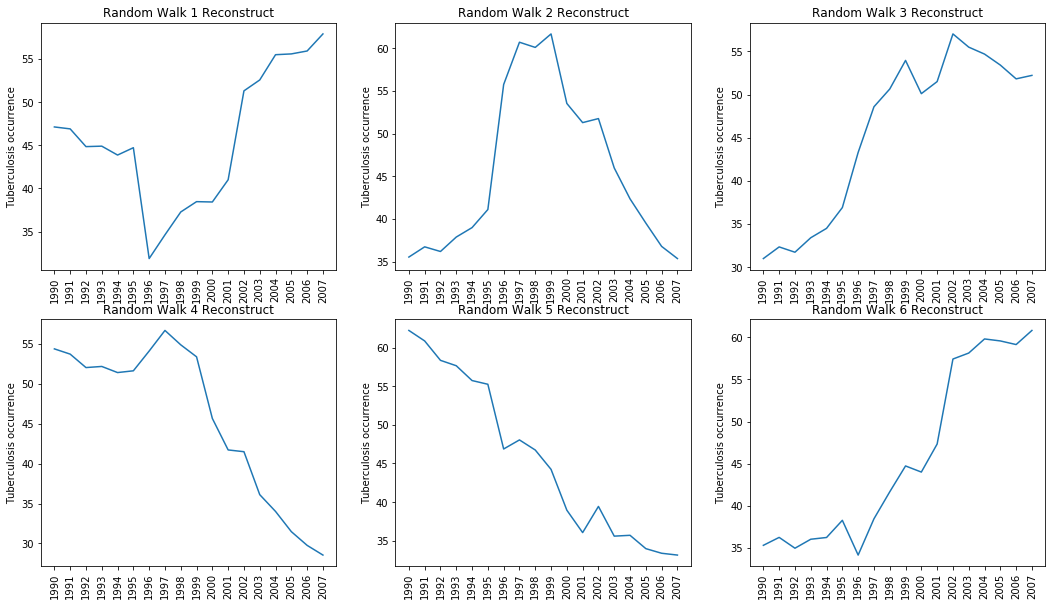

In [0]:
# plot reconstructed graph
fig = plt.figure(figsize=(18, 10))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    plt.plot(xlabels,reconGraph[i])
    plt.xticks(rotation=90)
    plt.ylabel('Tuberculosis occurrence')
    plt.title('Random Walk {} Reconstruct'.format(i+1))

In [0]:
Residual = []
for i in range(0, 6):
  Resi_list = []
  for j in range(0,n):
    Residual_num = abs(reconGraph[i][j] - RW_list[i][j])
    Resi_list.append(Residual_num)
  Residual.append(Resi_list)

In [0]:
from sklearn.metrics import mean_squared_error
np.sqrt(np.round(mean_squared_error(reconGraph[0],Residual[0]),decimals=2,))

40.32914578812698

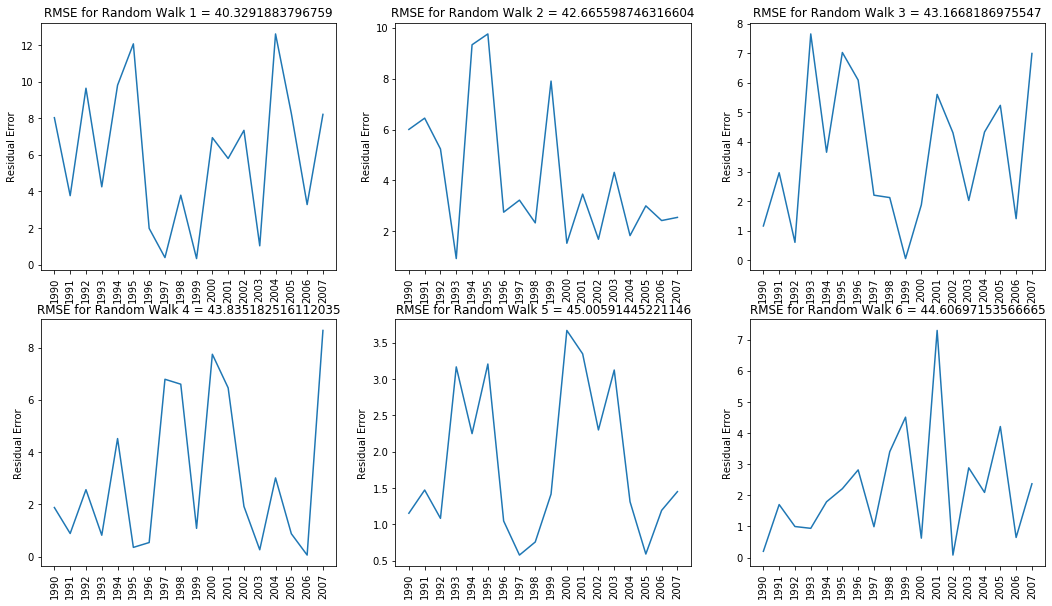

In [0]:
from sklearn.metrics import mean_squared_error
fig = plt.figure(figsize=(18, 10))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    plt.plot(xlabels,Residual[i])
    plt.xticks(rotation=90)
    plt.ylabel('Residual Error')
    plt.title('RMSE for Random Walk {} = '.format(i+1) + str(np.sqrt(mean_squared_error(reconGraph[i],Residual[i]))))

#### Q5.4

**4 principal components are used to reconstruct the data. Compared to Q3, RMSE for 4 principal components is 0.56. The RMSEs calculated in this question are much bigger than Q3. This might be because the random walk had the data which is generated randomly. Although the mean and std are the same as the original data, the movements of of the object or the values taken by a certain variable are completely random. Therefore the distribution looks much different from the original data, especially for monotonic data (Since normally the random walk has many oscillations.)**

### Question 6

Explain how could you use PCA to do anomaly detection.[1]

**Anomaly detection is based on the reconstruction error. It is expected that the reconstruction error (such as RMSE) is high for the anomaly data while the error is low for the non-anomaly data. In PCA, the reconstruction error is related to the number of principal components we use for reconstruction. The more we use, the better PCA can learn the underlying structure of the original data. If we use many principal components, the reconstructed data is more closer to the origianl data, the reconstruction error will be minimized and some anomaly data cannot be detected. If we use very few principal components, the reconstructed data is deviated from the original data, causing hihger reconstruction error, which means some normal data will be treated as anomaly. Therefore, we need to set a baseline for the number of principal component we choose. We can find the optimal number of principal components based on evaluation metrics (such as precision and recall).**

## References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Eigenfaces:
1. Snippets from: https://github.com/svetlana-topalova/eigenfaces/blob/master/Eigenfaces.ipynb
2. https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/

Author: Parth Jaggi